In [2]:
# when you change the code of .py document in the ecolab package, you have to restart the kernel of jupyter notebook and 
# run the below import code again to make sure the newest change involved.

import numpy as np
import numba
from ecolab import run_ecolab
from ecolab.environment import Environment
from ecolab.agents import Rabbit, RHD_Status
import warnings
warnings.filterwarnings("ignore")

import matplotlib
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from matplotlib import rc




In [8]:
# create the environment
env = Environment(shape = [40,40])

#create agents(infants and adults)
Ninfants = 5
Nadults = 45
Infected_Adults = 5
agents = []

for i in range(Ninfants):
    infant = Rabbit(age = np.random.randint(0,90), position = env.get_random_location()) ## age < 90 => infants
    agents.append(infant)
for i in range(Nadults):
    adult = Rabbit(age = np.random.randint(90,300), position = env.get_random_location())
    agents.append(adult)
for i in range(Infected_Adults):
    infected_adult = Rabbit(age = np.random.randint(90,300), position = env.get_random_location(), infected=True)   
    agents.append(infected_adult)


In [9]:
record, sus, infected, immune, total, infant, agents = run_ecolab(env, agents, Niteration=[0, 365])

In [ ]:
# for i in range(100):
#     infected_adult = Rabbit(age = np.random.randint(90,300), position = env.get_random_location(), infected=True)   
#     agents.append(infected_adult)

# # The start time must be consistent with the last end time
# record, sus, infected, immune, total, infant, agents = run_ecolab(env, agents, Niteration=[250, 300],sus=sus,infected=infected, immune=immune, total=total, infant=infant)


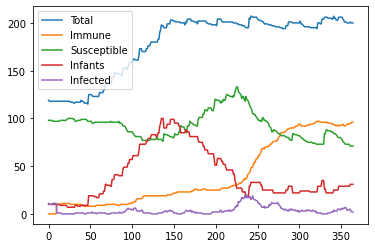

In [55]:
%matplotlib inline

fig, ax = plt.subplots()
ax.plot(total, label='Total')
ax.plot(immune, label='Immune')
ax.plot(sus, label='Susceptible')
ax.plot(infant, label='Infants')
ax.plot(infected, label='Infected')
#ax.plot(male, label='Male')
#ax.plot(female, label='Female')


leg = ax.legend();

In [5]:
def draw_animation(fig,record,fps=20,saveto=None, env=(20,20)):
    """
    Draw the animation for the content of record. This doesn't use the draw
    functions of the classes.
    - fig figure to draw to
    - record = the data to draw
    - fps = frames per second
    - saveto = where to save it to
    """
    #rc('animation', html='html5')
    if len(record)==0: return None

    im = plt.imshow(np.zeros(env), interpolation='none', aspect='auto', vmin=0, vmax=3, cmap='gray')
    ax = plt.gca()

    susceptible = ax.plot(np.zeros(1),np.zeros(1),'b.',markersize=10)
    infection = ax.plot(np.zeros(1),np.zeros(1),'r^',markersize=10,mew=3)
    immune = ax.plot(np.zeros(1),np.zeros(1),'yP',markersize=10,mew=3)

    def animate_func(i):
            im.set_array(np.zeros(env))
            ags = record[i]
            if len(ags)==0:
                immune[0].set_data([],[])
                infection[0].set_data([],[])
                return
            #INFECTION
            coords = ags[ags[:, -1] == 1][:, 0:2]
            infection[0].set_data(coords[:,1],coords[:,0])
            
            #IMMUNE
            coords = ags[ags[:, -1] == 2][:, 0:2]
            immune[0].set_data(coords[:,1],coords[:,0])
            
            #SUSCEPTIBLE 
            coords = ags[ags[:, -1] == 0][:, 0:2]
            susceptible[0].set_data(coords[:,1],coords[:,0])
            
    anim = animation.FuncAnimation(
                                   fig, 
                                   animate_func, 
                                   frames = len(record),
                                   interval = 1000 / fps, repeat=False # in ms
                                   )
    if saveto is not None: anim.save(saveto, fps=fps, extra_args=['-vcodec', 'libx264']) 
    from IPython.display import HTML
    return HTML(anim.to_jshtml())

<IPython.core.display.Javascript object>


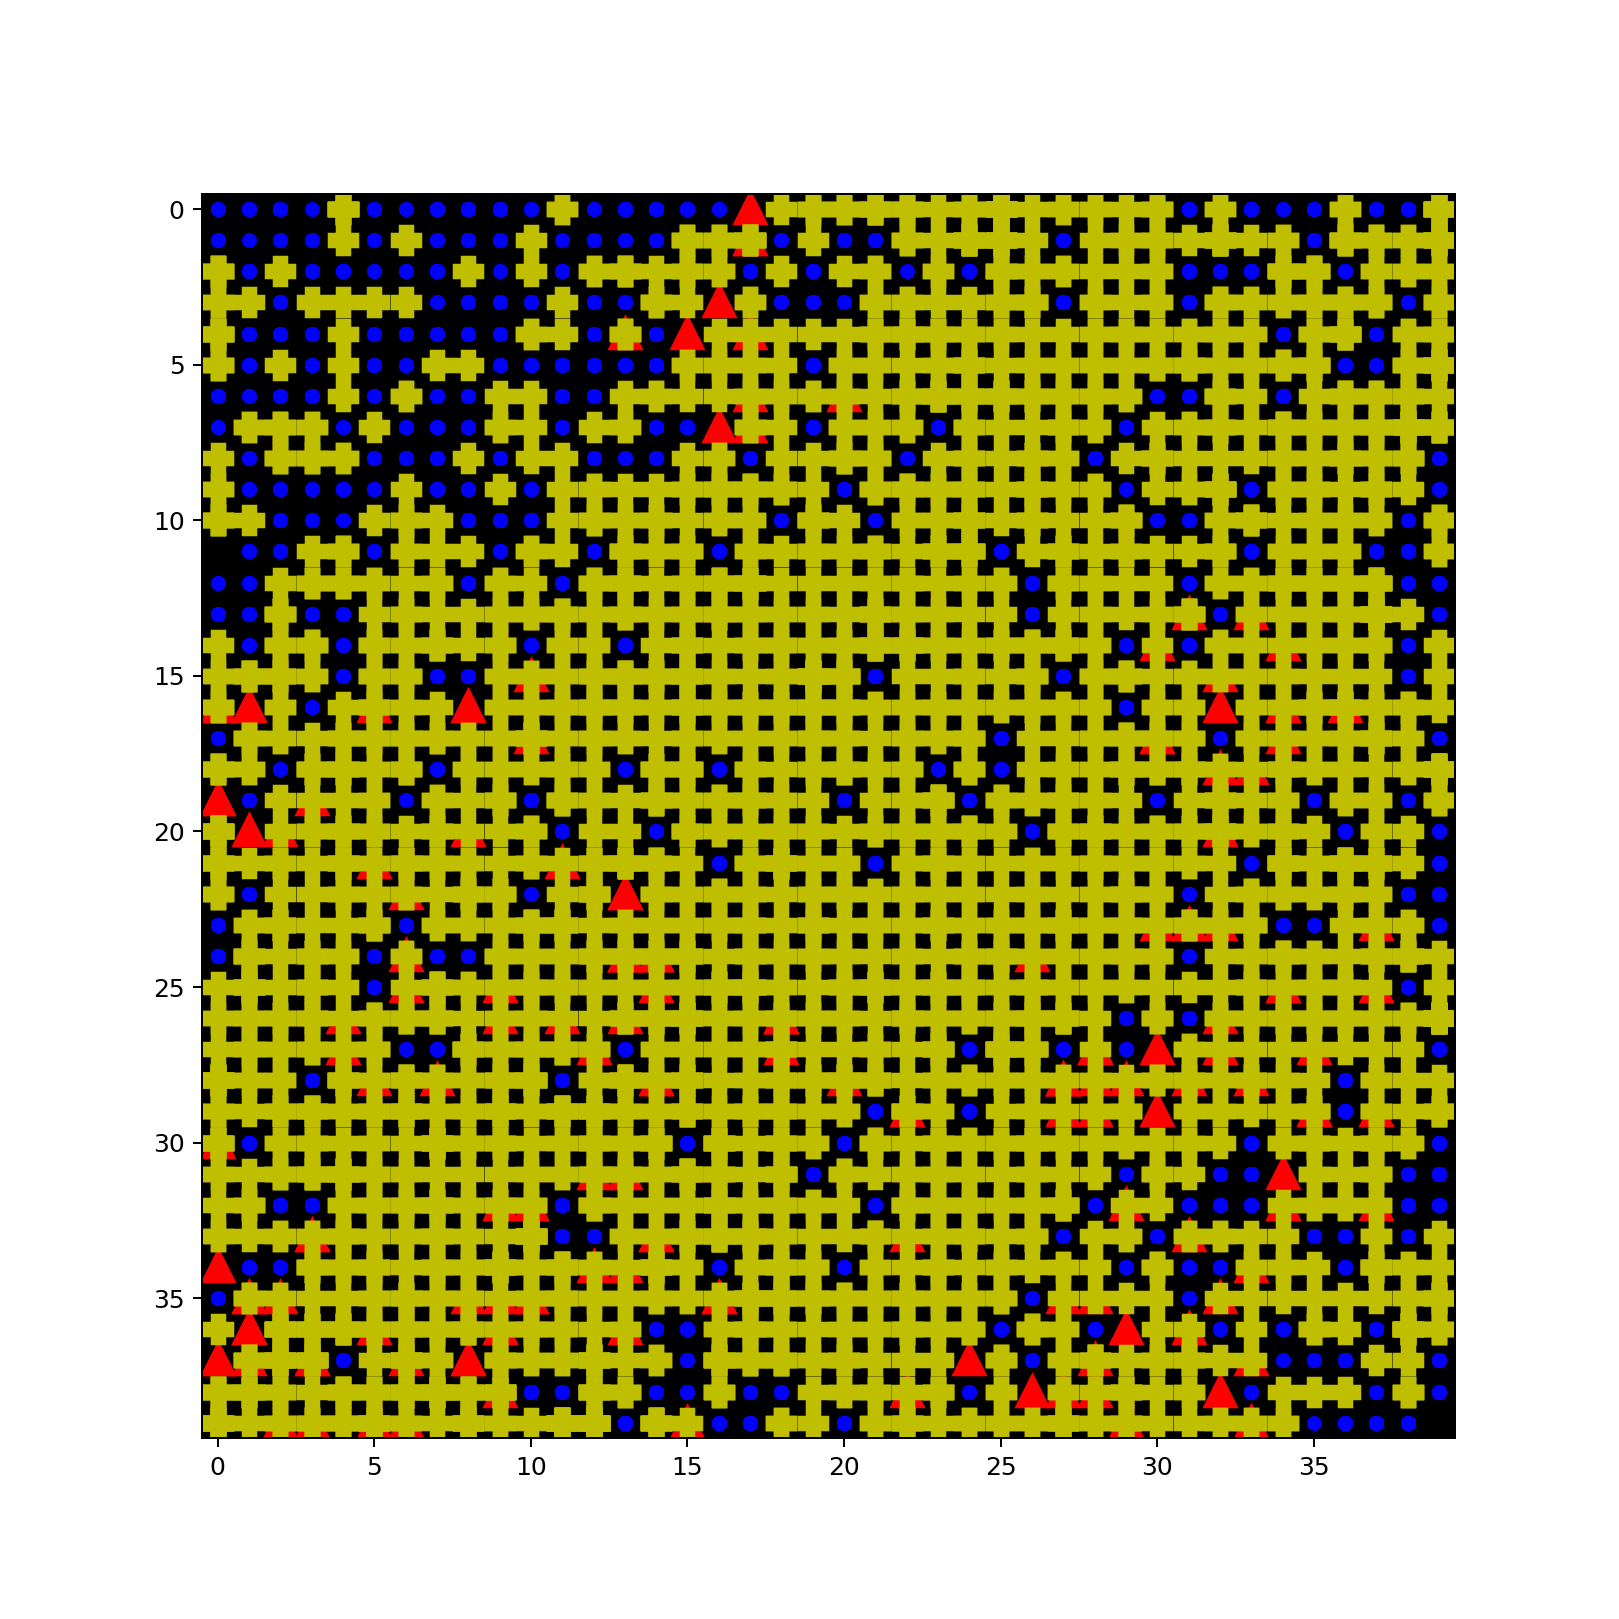

In [10]:
%matplotlib notebook 
fig1 = plt.figure( figsize=(5,5) )
draw_animation(fig1, record[::5],5,saveto=None, env=(40,40)) #draw every 5th frame